In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv("../data/processed/amazon_reviews_processed.csv")

df = df[['review', 'ratings']]


df['review'] = df['review'].astype(str)
df['ratings'] = df['ratings'].astype(int)

df.head()


,review,ratings
0,This spray is really nice. It smells really go...,5
1,"This product does what I need it to do, I just...",4
2,"Smells good, feels great!",5
3,Felt synthetic,1
4,Love it,5


In [3]:
X = df['review']
y = df['ratings']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

print("Train:", len(X_train), len(y_train))
print("Test :", len(X_test), len(y_test))


Train: 517551 517551
Test : 129388 129388


<h3>NAIVE BAYES</h3>

In [4]:
nb_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        lowercase=True,
        stop_words="english",
        max_features=50000
    )),
    ("nb", MultinomialNB())
])


In [5]:
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=50000, stop_words='english')),
                ('nb', MultinomialNB())])

In [6]:
y_pred = nb_pipeline.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Naive Bayes Accuracy: 0.6584304572294185

Classification Report:

              precision    recall  f1-score   support

           1       0.70      0.51      0.59     19589
           2       0.17      0.00      0.00      8405
           3       0.44      0.02      0.03     10927
           4       0.36      0.01      0.02     15045
           5       0.66      0.99      0.79     75422

    accuracy                           0.66    129388
   macro avg       0.47      0.31      0.29    129388
weighted avg       0.58      0.66      0.55    129388



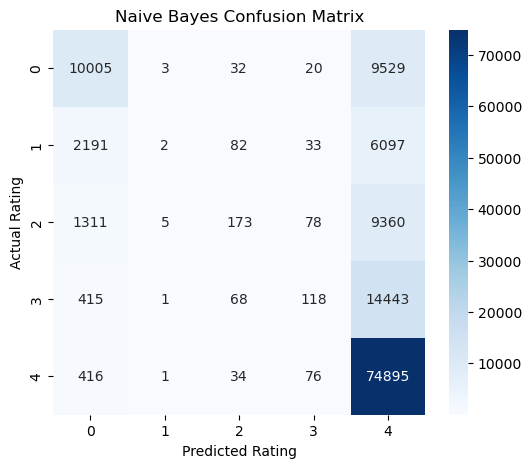

In [7]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Rating")
plt.ylabel("Actual Rating")
plt.title("Naive Bayes Confusion Matrix")
plt.show()


<h3>Logistic Regression</h3>

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
lr_pipeline = Pipeline([
    ("tfidf", TfidfVectorizer(
        lowercase=True,
        stop_words="english",
        max_features=50000,
        ngram_range=(1, 2)
    )),
    ("lr", LogisticRegression(
        max_iter=1000,
        n_jobs=-1,
        class_weight="balanced"
    ))
])


In [10]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=50000, ngram_range=(1, 2),
                                 stop_words='english')),
                ('lr',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1))])

In [11]:
y_pred_lr = lr_pipeline.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.6198101833245742

Classification Report:

              precision    recall  f1-score   support

           1       0.65      0.64      0.65     19589
           2       0.22      0.33      0.26      8405
           3       0.27      0.35      0.30     10927
           4       0.28      0.42      0.33     15045
           5       0.90      0.73      0.81     75422

    accuracy                           0.62    129388
   macro avg       0.46      0.49      0.47    129388
weighted avg       0.69      0.62      0.65    129388

